In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston = sm.datasets.get_rdataset('Boston', 'MASS')

In [5]:
print(boston.__doc__)

====== ===============
Boston R Documentation
====== ===============

Housing Values in Suburbs of Boston
-----------------------------------

Description
~~~~~~~~~~~

The ``Boston`` data frame has 506 rows and 14 columns.

Usage
~~~~~

::

   Boston

Format
~~~~~~

This data frame contains the following columns:

``crim``
   per capita crime rate by town.

``zn``
   proportion of residential land zoned for lots over 25,000 sq.ft.

``indus``
   proportion of non-retail business acres per town.

``chas``
   Charles River dummy variable (= 1 if tract bounds river; 0
   otherwise).

``nox``
   nitrogen oxides concentration (parts per 10 million).

``rm``
   average number of rooms per dwelling.

``age``
   proportion of owner-occupied units built prior to 1940.

``dis``
   weighted mean of distances to five Boston employment centres.

``rad``
   index of accessibility to radial highways.

``tax``
   full-value property-tax rate per \\$10,000.

``ptratio``
   pupil-teacher ratio by town.



In [6]:
dboston = boston.data

In [7]:
dboston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

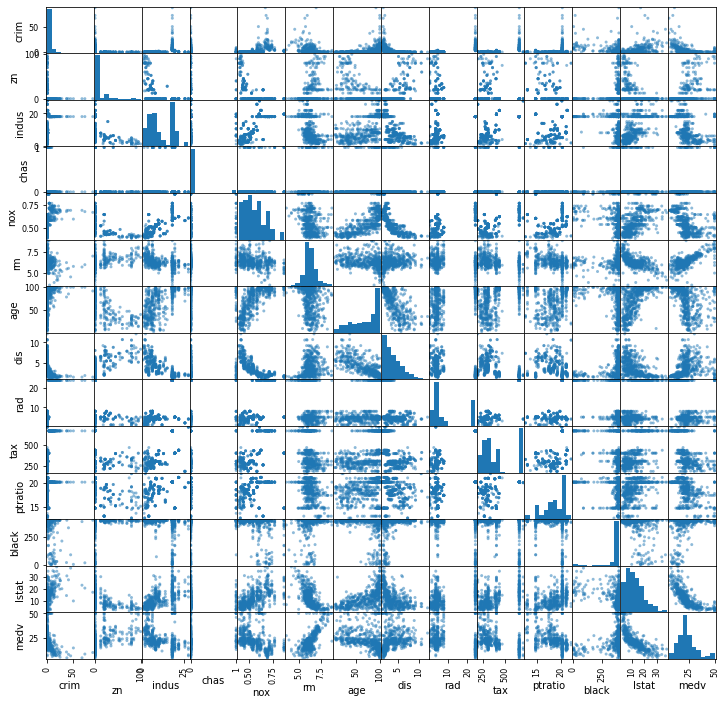

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(dboston, figsize = (12, 12));

In [16]:
corr = dboston.corr() 
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


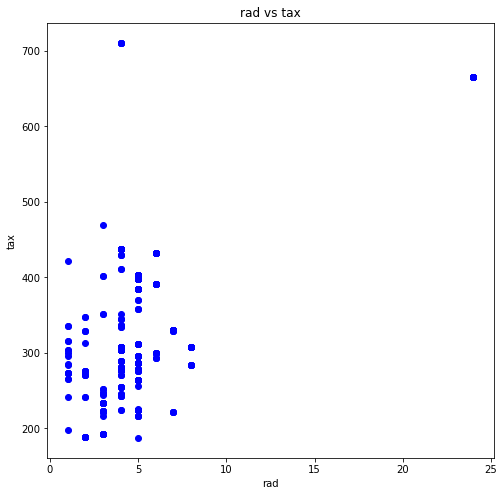

In [18]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(dboston['rad'], dboston['tax'], 'bo')
ax.set(title="rad vs tax",
      xlabel="rad",
      ylabel="tax");

In [17]:
x = sm.add_constant(dboston.drop(['crim'], axis=1))
y = dboston['crim'].values

model = sm.OLS(y, x)
resp = model.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.57e-56
Time:                        19:37:43   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0